# Exam

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data <- c(514,536,345,440,427,443,386,418,364,
          483,506,385,410,561,275,306,294,402,
          350,343,480,334,324,414,296)

Given a set of $N$ measurements $D=\{y_i\}$, from Bayes’ theorem: 

$$
P(\mu| D, \sigma) \propto P(D|\mu,\sigma) \times P(\mu|\sigma)
$$

We assume that data are independent, i.e. a measurement of one datum does not interfere on the outcome of another (given $\mu$ and $\sigma$). Hence, the **Likelihood** of the data is:

$$
P(D|\mu\sigma) = \prod_j P(y_j |\mu,\sigma) = \prod_j \frac{1}{\sigma \sqrt{2\pi}} \exp \Big[ \frac{(y_j-\mu)^2}{2 \sigma^2} \Big]
$$

Let us assume our **Prior** has a **Normal** shape with mean $m$ and variance $s^2$, $Norm(m,s^2)$:

$$
G(\mu|m,s) \propto \exp \Big[ - \frac{1}{2s^2} (\mu-m)^2 \Big]
$$

The shape of the **Likelihood** is:

$$
f(y|\mu,\sigma) \propto \exp \Big[ - \frac{1}{2\sigma^2} (y-\mu)^2 \Big]
$$

The product LikelihoodxPrior becomes:

$$
f(y|\mu,\sigma) \times G(\mu|m,s) \propto \exp-\frac{1}{2}\Big[ \frac{(y-\mu)^2}{\sigma^2}+\frac{(\mu-m)^2}{s^2} \Big]
$$

With little algebra, it can be seen that the Posterior is a Normal distribution itself with mean and variance given by:

$$
m' = \frac{\sigma^2 m + s^2 y}{\sigma^2+s^2} \qquad (s')^2 = \frac{\sigma^2 s^2}{\sigma^2 + s^2}
$$

With the definition $\bar{y} = \frac{1}{N} \sum_j y_j $ it is possible to demonstrate that:

$$
m'= \frac{1/s^2}{N/\sigma^2 + 1/s^2} m + \frac{N/\sigma^2}{N/\sigma^2 + 1/s^2} \bar{y} \qquad \frac{1}{(s')^2} = \frac{\sigma^2+Ns^2}{\sigma^2s^2} 
$$

In [3]:
# Utils
n.sample <- 4000
mu <- seq(300,500,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

N <- length(data)
y.bar <- mean(data)

sigma.sq <- (80**2)
s.sq <- (80**2)
m <- 325

# Compute mean and sd for the Posterior
mu.post <- (1/s.sq) / (N/sigma.sq + 1/s.sq) * m + (N/sigma.sq) / (N/sigma.sq + 1/s.sq) * y.bar
sd.sq.post <- (sigma.sq * s.sq) / (sigma.sq + N * s.sq)


# Determine the Prior
norm.prior <- dnorm(mu,mean=m,sd=sqrt(s.sq))

# Determine the Posterior 
norm.post <- dnorm(mu,mean=mu.post,sd=sqrt(sd.sq.post))

# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
norm.post <- norm.post/(delta.mu*sum(norm.post))

cat("Posterior mean: ",mu.post,'\n')
cat("Posterior sd  : ",sqrt(sd.sq.post),'\n')


Posterior mean:  398.5 
Posterior sd  :  15.68929 


In [4]:
x1 <- mu.post - 2 * sqrt(sd.sq.post)
x2 <- mu.post + 2 * sqrt(sd.sq.post)

cat("x1",x1,'\n')
cat("x2",x2)

x1 367.1214 
x2 429.8786

In [5]:
# Evaluate 95% credibility interval for Normal Posterior 

norm.area <- delta.mu*cumsum(norm.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.norm <- cl.func(mu,norm.area,cl)

cat("Normal Posterior (Normal Prior)  :\t", 'x1=', x.norm[1],'\tx2=', x.norm[2],'\n')

Normal Posterior (Normal Prior)  :	 x1= 367.7419 	x2= 429.2073 


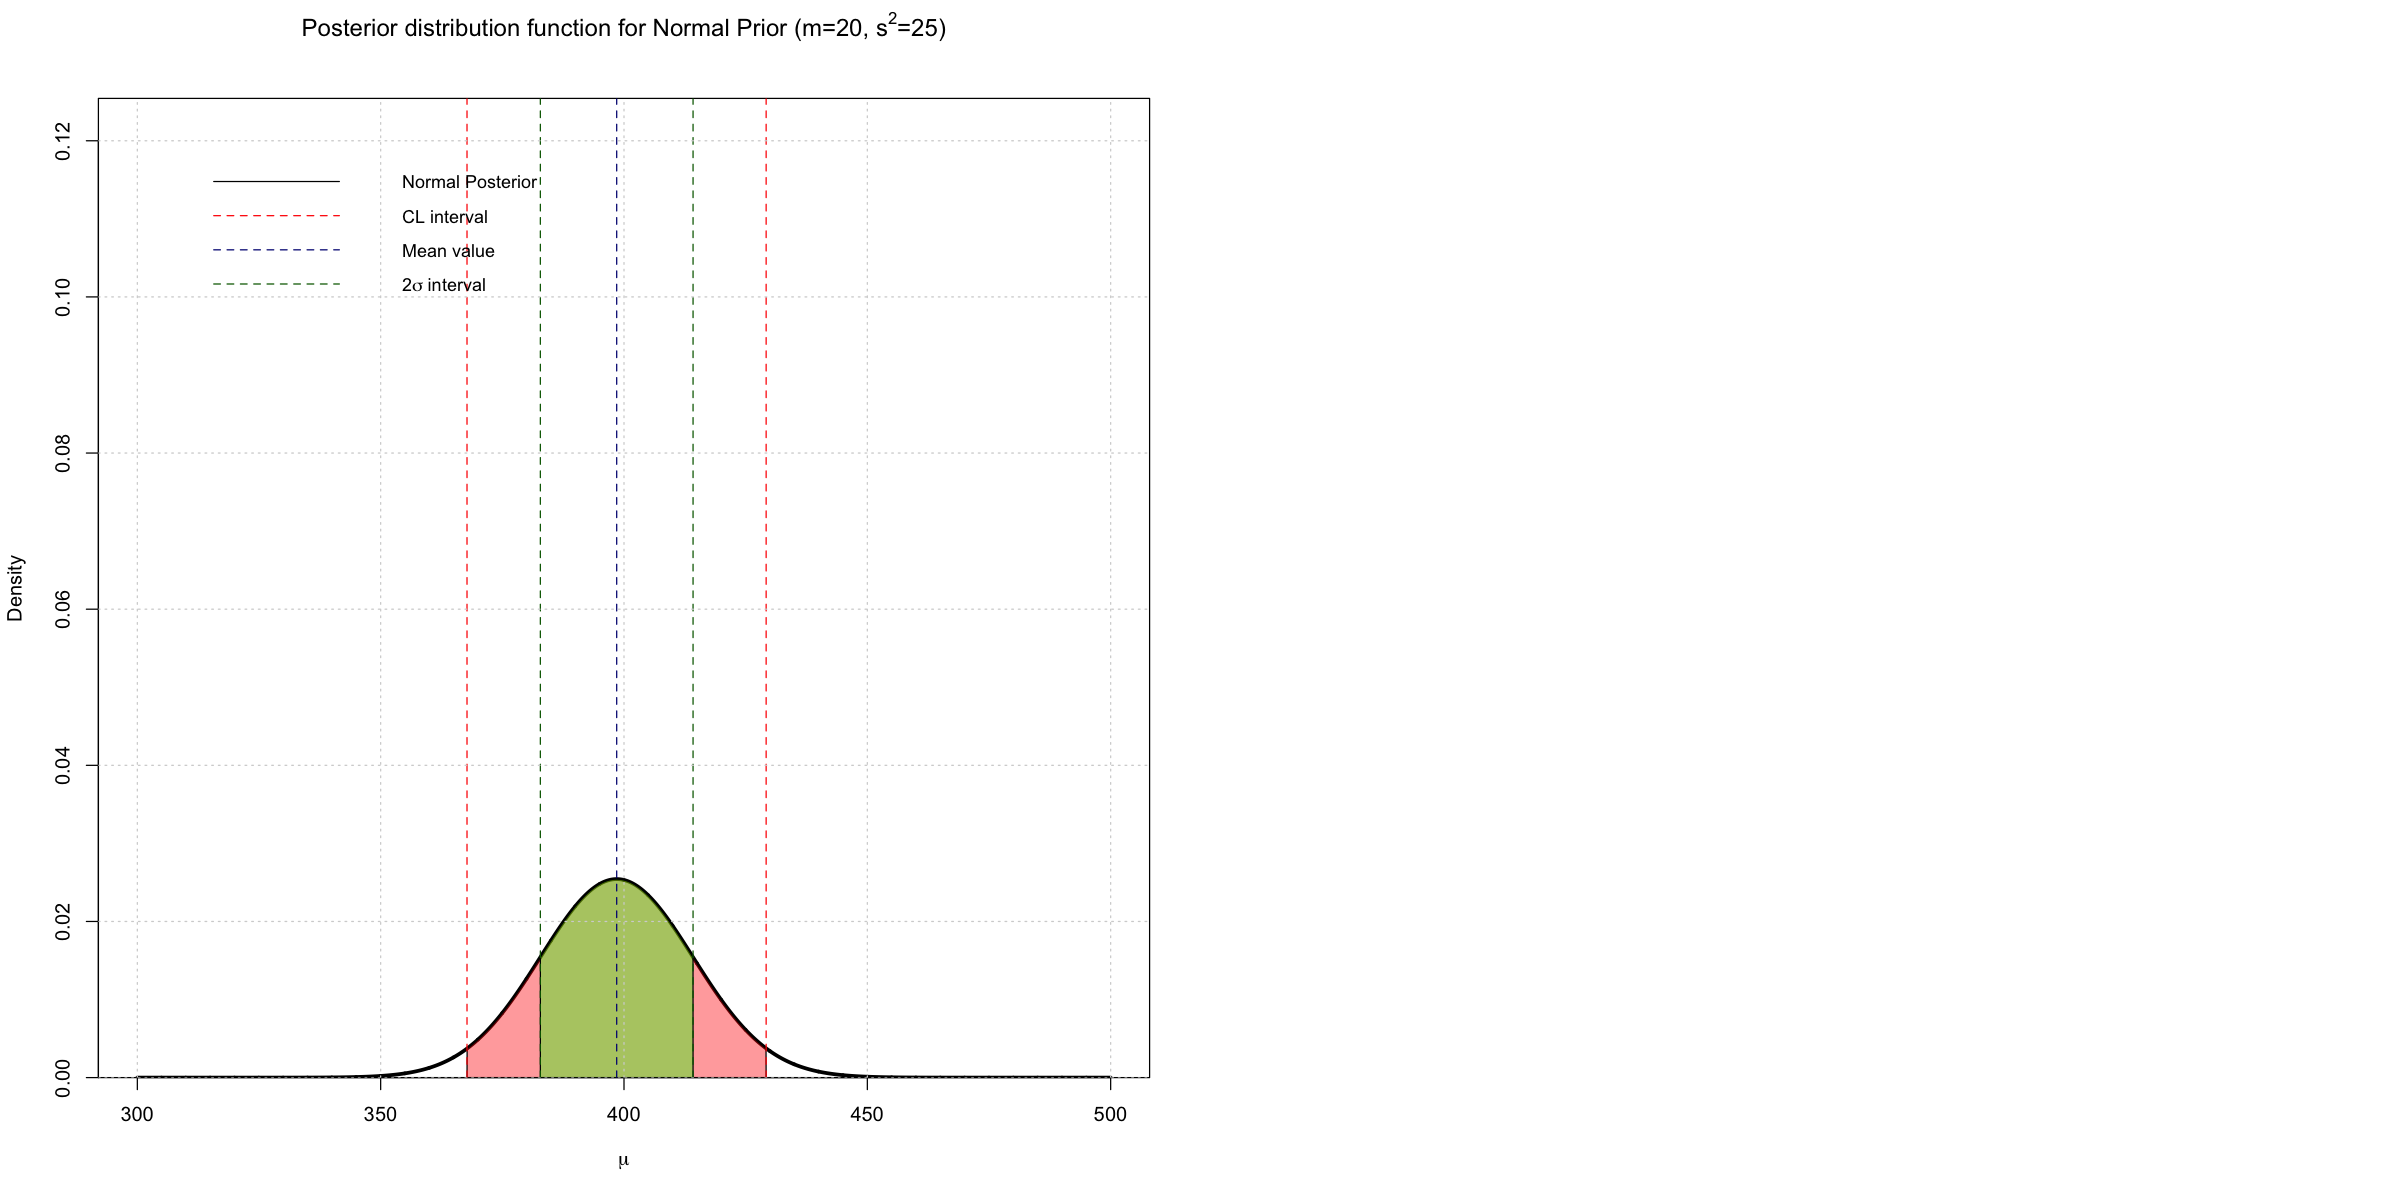

In [6]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Normal Posterior
plot(mu, norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(norm.post)+0.1),
     lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), ylab='Density')

title(TeX(sprintf("Posterior distribution function for Normal Prior (m=20,$s^2$=25)")),line=3)
x = x.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

xsd = c(mu.post-sqrt(sd.sq.post),mu.post+sqrt(sd.sq.post))

xp <- c(xsd[1],mu[mu>xsd[1] & mu<xsd[2]],xsd[2])
yp <- c(0,norm.post[which(mu>xsd[1] & mu<xsd[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))


abline(v=x[1], lty=2,col='red',lwd=1)
abline(v=x[2], lty=2,col='red',lwd=1)
abline(v=mu.post, lty=2,col='navy',lwd=1)
abline(v=mu.post+sqrt(sd.sq.post), lty=2,col='darkgreen',lwd=1)
abline(v=mu.post-sqrt(sd.sq.post), lty=2,col='darkgreen',lwd=1)

text(x[1]-0.6, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2]+0.6, par("usr")[4] + 0.025, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.post, par("usr")[3] - 0.02 , labels = TeX(sprintf("$\\mu$= %0.3f",mu.post)), pos=1, cex=1.5, col="navy", xpd=TRUE)
text(mu.post+2.1+sqrt(sd.sq.post), par("usr")[3] + 0.26 , labels = TeX(sprintf("$\\sigma$= %0.3f",sqrt(sd.sq.post))), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)

legend("topleft", inset=0.05,legend=c("Normal Posterior","CL interval","Mean value",TeX(sprintf("2$\\sigma$ interval"))),
       col=c("black","red","navy","darkgreen"), lty=c(1,2,2,2), cex=0.9,box.lty=0)

grid()

In [7]:
# Compute the hyphotesis testing 
p0 <- 350
post <- function(x){ dnorm(x, mu.post, sqrt(sd.sq.post)) } 
result <- integrate(post, lower=0, upper=p0)

result

0.0009964761 with absolute error < 1.5e-06

The probability is less than the pvalue, hence we reject the hyphotesis.